# Shapely

In [17]:
from shapely import Point, LineString, Polygon

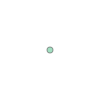

In [5]:
# Crear un punto
point = Point(3, 5)
point

In [6]:
type(point)

shapely.geometry.point.Point

In [7]:
print(point)

POINT (3 5)


WKT (Well-Known Text) es un formato para interpretar correctamente las coordenadas geográficas.

In [8]:
point.wkt

'POINT (3 5)'

In [9]:
point.x

3.0

In [10]:
point.y

5.0

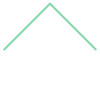

In [11]:
# Crear una línea
point_1 = Point(0, 0)
point_2 = Point(4, 4)
point_3 = Point(8, 0)

line = LineString([point_1, point_2, point_3])
line

In [12]:
# Longitud de la línea
line.length

11.313708498984761

In [ ]:
import math
math.sqrt((4**2 + 4**2)) * 2 

11.313708498984761

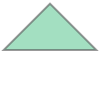

In [14]:
# Crear un polígono
polygon = Polygon([point_1, point_2, point_3])
polygon

In [15]:
polygon.area

16.0

In [16]:
polygon.wkt

'POLYGON ((0 0, 4 4, 8 0, 0 0))'

In [20]:
# Crear geometrías múltiples
from shapely import MultiPoint, MultiLineString, MultiPolygon

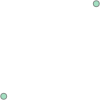

In [21]:
multipoint = MultiPoint([point_1, point_2])
multipoint

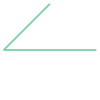

In [22]:
multilinestring = MultiLineString([LineString([point_1, point_2]), LineString([point_1, point_3])])
multilinestring

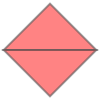

In [23]:
point_4 = Point(4, -4)
multipolygon = MultiPolygon([Polygon([point_1, point_2, point_3]), Polygon([point_1, point_3, point_4])])
multipolygon

In [24]:
multipolygon.wkt

'MULTIPOLYGON (((0 0, 4 4, 8 0, 0 0)), ((0 0, 8 0, 4 -4, 0 0)))'

# Descarga de datos y descomprimir zip

La librería **requests** es la herramienta estándar de Python para realizar peticiones HTTP de manera sencilla. Permite descargar archivos, consumir APIs REST, enviar datos POST, manejar autenticación y trabajar con cookies y sesiones. En el ejemplo mostrado, usamos `requests.get()` para descargar y obtenemos el contenido con `.content` y lo guardamos en modo binario ('wb'). Aunque este es un uso básico, requests también permite **web scraping** (extrayendo datos de páginas HTML), **consumo de APIs**, **envío de formularios**, **descarga con progreso**, **manejo de autenticación OAuth**, y **sesiones persistentes** para mantener cookies entre peticiones.

Ejemplo para bajar datos de FIRMS y CONABIO:
- [CONABIO-dest23w](http://www.conabio.gob.mx/informacion/gis/?vns=gis_root/dipol/estata/dest23gw)
- [FIRMS/Active Fire Data](https://firms.modaps.eosdis.nasa.gov/active_fire/)

In [12]:
import requests
import zipfile
import os

In [13]:
# Directorios (crear entidades_federativas y firms si no existen dentro de data)
path_data = os.path.join(os.getcwd(), 'data')

path_entidades = os.path.join(path_data, 'entidades')
os.makedirs(path_entidades, exist_ok=True)

path_entidades

'c:\\data\\curso_python_geo\\data\\entidades'

In [14]:
path_firms = os.path.join(path_data, 'firms')
os.makedirs(path_firms, exist_ok=True)
path_firms

'c:\\data\\curso_python_geo\\data\\firms'

In [7]:
# Descarga las entidades federativas de México desde CONABIO
url = 'http://www.conabio.gob.mx/informacion/gis/maps/geo/dest23gw.zip'
zip_name_entidades = url.split('/')[-1]
zip_name_entidades

'dest23gw.zip'

In [29]:
# Descargar el archivo y guardarlo en el directorio de salida
file = requests.get(url) # Descargar el archivo
open(os.path.join(path_entidades, zip_name_entidades), 'wb').write(file.content) # Guardar el archivo
file.close() # Cerrar la conexión

In [30]:
# Descomprimir el archivo
zf = zipfile.ZipFile(os.path.join(path_entidades, zip_name_entidades), "r") # Abrir el archivo ZIP en modo lectura
for i in zf.namelist(): # Listar los archivos dentro del ZIP
    zf.extract(i, path = path_entidades) # Extraer cada archivo en el directorio de salida

In [15]:
# Lo mismo para FIRMS
url = 'https://firms.modaps.eosdis.nasa.gov/data/active_fire/suomi-npp-viirs-c2/shapes/zips/SUOMI_VIIRS_C2_Central_America_48h.zip'
zip_name_firms = url.split('/')[-1]
zip_name_firms

'SUOMI_VIIRS_C2_Central_America_48h.zip'

In [35]:
file = requests.get(url) # Descargar el archivo
open(os.path.join(path_firms, zip_name_firms), 'wb').write(file.content) # Guardar el archivo
file.close() # Cerrar la conexión

In [ ]:
# Descomprimir el archivo
zf = zipfile.ZipFile(os.path.join(path_firms, zip_name_firms), "r") # Abrir el archivo ZIP en modo lectura
for i in zf.namelist(): # Listar los archivos dentro del ZIP
    zf.extract(i, path = path_firms) # Extraer cada archivo en el directorio de salida

# Geopandas

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [17]:
# Abrir el archivo shapefile con geopandas
gdf_mex = gpd.read_file(os.path.join(path_entidades, zip_name_entidades.replace('.zip', '.shp')))

In [18]:
gdf_mex.head()

,CVEGEO,CVE_ENT,NOMGEO,CVE_CAP,NOM_CAP,COV_,COV_ID,AREA,PERIMETER,geometry
0,01,01,Aguascalientes,10001,Aguascalientes,0,1,5558.673843,423.005983,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
1,02,02,Baja California,20001,Mexicali,1,2,73406.158609,3104.096911,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152..."
2,03,03,Baja California Sur,30001,La Paz,2,3,71407.136932,5094.093396,"MULTIPOLYGON (((-109.89451 22.87476, -109.8946..."
3,04,04,Campeche,20001,San Francisco de Campeche,3,4,57269.828744,1566.405110,"MULTIPOLYGON (((-91.9565 20.197, -91.95636 20...."
4,05,05,Coahuila de Zaragoza,300001,Saltillo,4,5,150671.222993,2414.885297,"POLYGON ((-102.31549 29.88, -102.31509 29.8799..."


In [19]:
# Ver su sistema de referencia espacial (CRS)
gdf_mex.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Figure size 1200x600 with 0 Axes>

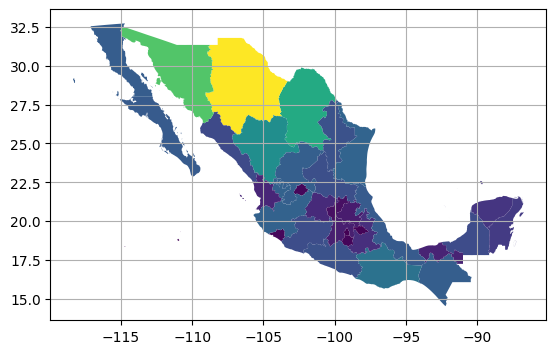

In [20]:
# Plot sencillo
plt.figure(figsize=(12,6))
gdf_mex.plot(column='AREA')
plt.grid()
plt.show()

In [21]:
gdf_mex.head()

,CVEGEO,CVE_ENT,NOMGEO,CVE_CAP,NOM_CAP,COV_,COV_ID,AREA,PERIMETER,geometry
0,01,01,Aguascalientes,10001,Aguascalientes,0,1,5558.673843,423.005983,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
1,02,02,Baja California,20001,Mexicali,1,2,73406.158609,3104.096911,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152..."
2,03,03,Baja California Sur,30001,La Paz,2,3,71407.136932,5094.093396,"MULTIPOLYGON (((-109.89451 22.87476, -109.8946..."
3,04,04,Campeche,20001,San Francisco de Campeche,3,4,57269.828744,1566.405110,"MULTIPOLYGON (((-91.9565 20.197, -91.95636 20...."
4,05,05,Coahuila de Zaragoza,300001,Saltillo,4,5,150671.222993,2414.885297,"POLYGON ((-102.31549 29.88, -102.31509 29.8799..."


In [22]:
# Corregir la codificación de NOMGEO
gdf_mex['NOMGEO'] = gdf_mex['NOMGEO'].str.encode('latin1').str.decode('utf-8')
gdf_mex.head()

,CVEGEO,CVE_ENT,NOMGEO,CVE_CAP,NOM_CAP,COV_,COV_ID,AREA,PERIMETER,geometry
0,01,01,Aguascalientes,10001,Aguascalientes,0,1,5558.673843,423.005983,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
1,02,02,Baja California,20001,Mexicali,1,2,73406.158609,3104.096911,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152..."
2,03,03,Baja California Sur,30001,La Paz,2,3,71407.136932,5094.093396,"MULTIPOLYGON (((-109.89451 22.87476, -109.8946..."
3,04,04,Campeche,20001,San Francisco de Campeche,3,4,57269.828744,1566.405110,"MULTIPOLYGON (((-91.9565 20.197, -91.95636 20...."
4,05,05,Coahuila de Zaragoza,300001,Saltillo,4,5,150671.222993,2414.885297,"POLYGON ((-102.31549 29.88, -102.31509 29.8799..."


<Axes: >

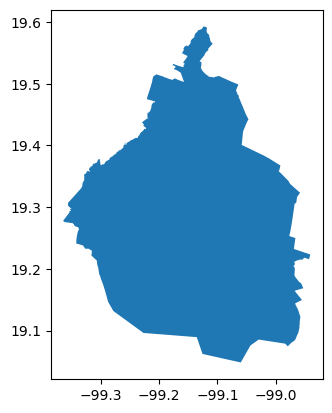

In [24]:
# Quedarme con NOMGEO igual a México
gdf_cdmx = gdf_mex[gdf_mex['NOMGEO'] == 'Ciudad de México']
gdf_cdmx.plot()

In [50]:
gdf_cdmx

,CVEGEO,CVE_ENT,NOMGEO,CVE_CAP,NOM_CAP,COV_,COV_ID,AREA,PERIMETER,geometry
8,09,09,Ciudad de México,0,None,8,9,1486.183217,206.876266,"POLYGON ((-99.12215 19.59248, -99.12078 19.592..."


In [25]:
# Área de la CDMX
gdf_cdmx.geometry.area

C:\Users\UEC\AppData\Local\Temp\ipykernel_2540\1208425092.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_cdmx.geometry.area


8    0.128423
dtype: float64

In [26]:
# Reproyectar a CCL de México (EPSG:6372)
gdf_cdmx_ccl = gdf_cdmx.to_crs(epsg = 6372)
gdf_cdmx_ccl.geometry.area / 1e6

8    1486.183217
dtype: float64

[AEA vs CCL](https://map-projections.net/compare.php?p1=albers-equal-area-conic&p2=lambert-conformal-conic)

[proj.org](https://proj.org/en/stable/index.html)

In [27]:
# Ahora reproyectar a Albers Equal Area Conic (AEA) para México)
aea_mexico = '+proj=aea +lat_0=12 +lon_0=-102 +lat_1=17.5 +lat_2=29.5 +x_0=2500000 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs +type=crs'
gdf_cdmx_aea = gdf_cdmx.to_crs(aea_mexico)
gdf_cdmx_aea.geometry.area / 1e6

8    1494.312515
dtype: float64

In [28]:
# Reproyecta a UTM zona 14N (EPSG:32614)
gdf_cdmx_utm = gdf_cdmx.to_crs(epsg = 32614)

In [29]:
gdf_cdmx_utm.crs

<Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
gdf_cdmx_utm.geometry.area / 1e6

8    1493.129293
dtype: float64

In [31]:
# Reproyectar el gdf_mex a aea_mexico
gdf_mex_aea = gdf_mex.to_crs(aea_mexico)
gdf_mex_aea.crs

<Bound CRS: +proj=aea +lat_0=12 +lon_0=-102 +lat_1=17.5 +lat_2 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS 1980 ellipsoid using towgs84=0,0,0,0,0,0,0
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [34]:
# Agregar una nueva columna con el área en km²
gdf_mex_aea['area_aea'] = gdf_mex_aea.geometry.area / 1e6
gdf_mex_aea.head()

,CVEGEO,CVE_ENT,NOMGEO,CVE_CAP,NOM_CAP,COV_,COV_ID,AREA,PERIMETER,geometry,area_aea
0,01,01,Aguascalientes,10001,Aguascalientes,0,1,5558.673843,423.005983,"POLYGON ((2469549.901 1155213.63, 2469737.257 ...",5615.671162
1,02,02,Baja California,20001,Mexicali,1,2,73406.158609,3104.096911,"MULTIPOLYGON (((1313523.697 1832773.748, 13135...",73053.826390
2,03,03,Baja California Sur,30001,La Paz,2,3,71407.136932,5094.093396,"MULTIPOLYGON (((1694633.841 1223893.697, 16946...",72023.937389
3,04,04,Campeche,20001,San Francisco de Campeche,3,4,57269.828744,1566.405110,"MULTIPOLYGON (((3544976.076 940326.527, 354499...",57508.007322
4,05,05,Coahuila de Zaragoza,300001,Saltillo,4,5,150671.222993,2414.885297,"POLYGON ((2469500.425 1980889.78, 2469538.912 ...",151594.619712


In [36]:
# Sacar la diferencia entre el área original AREA que esta en CCL y la reproyectada AEA
gdf_mex_aea['dif_area'] = gdf_mex_aea['AREA'] - gdf_mex_aea['area_aea']
gdf_mex_aea.head()

,CVEGEO,CVE_ENT,NOMGEO,CVE_CAP,NOM_CAP,COV_,COV_ID,AREA,PERIMETER,geometry,area_aea,dif_area
0,01,01,Aguascalientes,10001,Aguascalientes,0,1,5558.673843,423.005983,"POLYGON ((2469549.901 1155213.63, 2469737.257 ...",5615.671162,-56.997319
1,02,02,Baja California,20001,Mexicali,1,2,73406.158609,3104.096911,"MULTIPOLYGON (((1313523.697 1832773.748, 13135...",73053.826390,352.332219
2,03,03,Baja California Sur,30001,La Paz,2,3,71407.136932,5094.093396,"MULTIPOLYGON (((1694633.841 1223893.697, 16946...",72023.937389,-616.800456
3,04,04,Campeche,20001,San Francisco de Campeche,3,4,57269.828744,1566.405110,"MULTIPOLYGON (((3544976.076 940326.527, 354499...",57508.007322,-238.178577
4,05,05,Coahuila de Zaragoza,300001,Saltillo,4,5,150671.222993,2414.885297,"POLYGON ((2469500.425 1980889.78, 2469538.912 ...",151594.619712,-923.396719


In [38]:
# Crear un nuevo gdf con las columnas NOMGEO y area_km2 y su geometría
gdf_select = gdf_mex_aea[['NOMGEO', 'AREA', 'area_aea', 'dif_area', 'geometry']]
type(gdf_select)

geopandas.geodataframe.GeoDataFrame

In [40]:
# Cambiar el nombre de la columna de NOMGEO a entidad
gdf_select_corr = gdf_select.rename(columns = {'NOMGEO':'entidad', 'AREA':'area_ccl'})
gdf_select_corr.head()

,entidad,area_ccl,area_aea,dif_area,geometry
0,Aguascalientes,5558.673843,5615.671162,-56.997319,"POLYGON ((2469549.901 1155213.63, 2469737.257 ..."
1,Baja California,73406.158609,73053.826390,352.332219,"MULTIPOLYGON (((1313523.697 1832773.748, 13135..."
2,Baja California Sur,71407.136932,72023.937389,-616.800456,"MULTIPOLYGON (((1694633.841 1223893.697, 16946..."
3,Campeche,57269.828744,57508.007322,-238.178577,"MULTIPOLYGON (((3544976.076 940326.527, 354499..."
4,Coahuila de Zaragoza,150671.222993,151594.619712,-923.396719,"POLYGON ((2469500.425 1980889.78, 2469538.912 ..."


In [41]:
# Exportar el gdf corregido a un nuevo archivo geojson
gdf_select_corr.to_file(os.path.join(path_entidades, 'entidades_federativas_area_correcta.geojson'), driver='GeoJSON')

In [43]:
# Exportar el gdf original y el corregido a un nuevo archivo geopackage
gdf_mex.to_file(os.path.join(path_entidades, 'entidades_federativas.gpkg'), layer = 'conabio', driver = 'GPKG')

gdf_select_corr.to_file(os.path.join(path_entidades, 'entidades_federativas.gpkg'), layer = 'procesado', driver = 'GPKG')

In [45]:
# Abrir shape de FIRMS
shapefile_path = os.path.join(path_firms, 'SUOMI_VIIRS_C2_Central_America_48h.shp')
gdf_firms = gpd.read_file(shapefile_path)

In [46]:
gdf_firms.head()

,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,DAYNIGHT,geometry
0,33.49162,-117.61858,304.35,0.40,0.37,2025-10-06,0947,N,nominal,2.0NRT,286.44,0.79,N,POINT (-117.61858 33.49162)
1,32.15644,-115.11214,305.04,0.49,0.41,2025-10-06,0947,N,nominal,2.0NRT,287.38,0.93,N,POINT (-115.11214 32.15644)
2,30.49821,-109.62907,322.03,0.35,0.57,2025-10-06,0947,N,nominal,2.0NRT,286.94,1.75,N,POINT (-109.62907 30.49821)
3,30.49906,-109.63260,295.07,0.35,0.57,2025-10-06,0947,N,nominal,2.0NRT,284.31,1.82,N,POINT (-109.6326 30.49906)
4,29.79965,-109.65757,320.74,0.36,0.57,2025-10-06,0947,N,nominal,2.0NRT,286.59,1.05,N,POINT (-109.65757 29.79965)


In [47]:
gdf_firms.describe()

,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,BRIGHT_TI5,FRP
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869,1869.000000,1869.000000
mean,20.028340,-81.719811,323.210583,0.448068,0.455078,2025-10-06 16:46:13.675000,292.131915,4.746554
min,7.007950,-117.619040,295.070000,0.320000,0.360000,2025-10-06 00:00:00,249.650000,0.100000
25%,9.609000,-96.170670,306.700000,0.390000,0.370000,2025-10-06 00:00:00,287.580000,1.280000
50%,19.438820,-84.306780,327.270000,0.420000,0.420000,2025-10-07 00:00:00,292.330000,2.750000
75%,31.071650,-63.710560,336.830000,0.490000,0.500000,2025-10-07 00:00:00,298.830000,5.230000
max,33.491620,-58.501010,367.000000,0.770000,0.770000,2025-10-08 00:00:00,328.680000,134.600000
std,10.437155,16.699539,17.024200,0.076638,0.106386,NaN,9.152205,8.632316


In [49]:
gdf_firms.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [64]:
gdf_sjoin = gpd.sjoin(gdf_select_corr.to_crs(epsg = 4326), gdf_firms)
gdf_sjoin.shape

(163, 19)

In [55]:
gdf_sjoin.head()

,entidad,area_ccl,area_aea,dif_area,geometry,index_right,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,DAYNIGHT
1,Baja California,73406.158609,73053.82639,352.332219,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152...",1590,30.70747,-115.97429,334.16,0.39,0.36,2025-10-07,2046,N,nominal,2.0NRT,307.37,1.69,D
1,Baja California,73406.158609,73053.82639,352.332219,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152...",1256,30.85075,-116.03297,297.92,0.39,0.36,2025-10-07,0930,N,nominal,2.0NRT,286.07,0.44,N
1,Baja California,73406.158609,73053.82639,352.332219,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152...",1255,31.84285,-116.58607,306.40,0.40,0.37,2025-10-07,0930,N,nominal,2.0NRT,287.80,0.84,N
1,Baja California,73406.158609,73053.82639,352.332219,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152...",826,31.91493,-116.71107,344.35,0.45,0.39,2025-10-06,2106,N,nominal,2.0NRT,311.35,21.87,D
1,Baja California,73406.158609,73053.82639,352.332219,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152...",824,31.91654,-116.70923,347.34,0.45,0.39,2025-10-06,2106,N,nominal,2.0NRT,311.81,28.81,D


In [65]:
gdf_firms.shape

(1869, 14)

In [63]:
# Unión espacial (spatial join) entre gdf_mex_corr y gdf_firms (ya están en el mismo CRS)
gdf_sjoin = gpd.sjoin(gdf_select_corr.to_crs(epsg = 4326), gdf_firms, how='inner', predicate='contains')
gdf_sjoin.shape

(163, 19)

In [72]:
gdf_sjoin.shape

(163, 19)

In [79]:
# Agregar el conteo de puntos de FIRMS por entidad federativa con programación estructurada
counts = []
for entidad in gdf_select_corr['entidad']:
    # print(f'Entidad: {entidad}')
    gdf_entidad = gdf_select_corr[gdf_select_corr['entidad'] == entidad]
    # print(f'gdf_entidad: {gdf_entidad.head}')

    count = gpd.sjoin(gdf_entidad.to_crs(epsg=4326), gdf_firms).shape[0]
    counts.append(count)

    print(f'Entidad: {entidad:20} PC: {count}')

gdf_select_corr['firms_count'] = counts
gdf_select_corr.head()

Entidad: Aguascalientes       PC: 0
Entidad: Baja California      PC: 11
Entidad: Baja California Sur  PC: 0
Entidad: Campeche             PC: 4
Entidad: Coahuila de Zaragoza PC: 16
Entidad: Colima               PC: 2
Entidad: Chiapas              PC: 1
Entidad: Chihuahua            PC: 5
Entidad: Ciudad de México     PC: 0
Entidad: Durango              PC: 0
Entidad: Guanajuato           PC: 11
Entidad: Guerrero             PC: 0
Entidad: Hidalgo              PC: 3
Entidad: Jalisco              PC: 0
Entidad: México               PC: 1
Entidad: Michoacán de Ocampo  PC: 0
Entidad: Morelos              PC: 0
Entidad: Nayarit              PC: 0
Entidad: Nuevo León           PC: 13
Entidad: Oaxaca               PC: 0
Entidad: Puebla               PC: 1
Entidad: Querétaro            PC: 0
Entidad: Quintana Roo         PC: 0
Entidad: San Luis Potosí      PC: 1
Entidad: Sinaloa              PC: 8
Entidad: Sonora               PC: 22
Entidad: Tabasco              PC: 24
Entidad: Tamaulipas   

,entidad,area_ccl,area_aea,dif_area,geometry,firms_count
0,Aguascalientes,5558.673843,5615.671162,-56.997319,"POLYGON ((2469549.901 1155213.63, 2469737.257 ...",0
1,Baja California,73406.158609,73053.826390,352.332219,"MULTIPOLYGON (((1313523.697 1832773.748, 13135...",11
2,Baja California Sur,71407.136932,72023.937389,-616.800456,"MULTIPOLYGON (((1694633.841 1223893.697, 16946...",0
3,Campeche,57269.828744,57508.007322,-238.178577,"MULTIPOLYGON (((3544976.076 940326.527, 354499...",4
4,Coahuila de Zaragoza,150671.222993,151594.619712,-923.396719,"POLYGON ((2469500.425 1980889.78, 2469538.912 ...",16


In [ ]:
# Agregar el conteo de puntos de FIRMS por entidad federativa
gdf_select_corr['firms_count_2'] = gdf_select_corr.to_crs(epsg=4326).geometry.apply(lambda x: gdf_firms.within(x).sum())

gdf_select_corr.head()

,entidad,area_ccl,area_aea,dif_area,geometry,firms_count,firms_count_2
0,Aguascalientes,5558.673843,5615.671162,-56.997319,"POLYGON ((2469549.901 1155213.63, 2469737.257 ...",0,0
1,Baja California,73406.158609,73053.826390,352.332219,"MULTIPOLYGON (((1313523.697 1832773.748, 13135...",11,11
2,Baja California Sur,71407.136932,72023.937389,-616.800456,"MULTIPOLYGON (((1694633.841 1223893.697, 16946...",0,0
3,Campeche,57269.828744,57508.007322,-238.178577,"MULTIPOLYGON (((3544976.076 940326.527, 354499...",4,4
4,Coahuila de Zaragoza,150671.222993,151594.619712,-923.396719,"POLYGON ((2469500.425 1980889.78, 2469538.912 ...",16,16


In [ ]:
# Crear nueva columa de DATE con la fecha y hora en formato datetime y CST

In [ ]:
# Ver tipo de dato de ACQ_DATE


In [ ]:
# Crea una nueva columna en gdf_firms con la suma de ACQ_DATE y AQC_TIME



In [ ]:
# DATE esta en formato string YYYY-MM-DD HHMM, hay que convertirlo a datetime


In [ ]:
# Asignar la zona horaria de UTC (tiempo universal coordinado) a la columna DATE


In [ ]:
# Convierte DATE a la zona horaria de Ciudad de México (CST, UTC-6) en una nueva columna DATE_CST


# Reproyección de coordenadas

In [82]:
import pyproj

In [85]:
# Reproyecta una coordenada de epsg:4326 a epsg:6372
transformer = pyproj.Transformer.from_crs("EPSG:4326", 'EPSG:6372', always_xy=True)

lon, lat  = -99.17642742495453, 19.32607298072103

x, y = transformer.transform(lon, lat)
x, y

(2795869.3434203323, 817211.4868859897)

In [ ]:
# Definiendo los CRS con proj4, de 4326 a AEA
